In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df1 = pd.read_csv('pokemon1.csv')
df1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [4]:
df2 = pd.read_csv('combats.csv')
df2.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
df1.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
df2.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [7]:
df1[df1['Name'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [8]:
df1[df1['#'] == 62]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False


In [9]:
df1[df1['#'] == 64]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
63,64,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False


In [18]:
df1.loc[df1['#'] == 63, 'Name'] = 'Primeape'
df1[df1['#'] == 63]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False


In [11]:
wins = df2['Winner'].value_counts().rename_axis('id').reset_index(name='wins')
wins.head()

,id,wins
0,163,152
1,154,136
2,438,136
3,428,134
4,432,133


In [12]:
fights = pd.concat(([df2['First_pokemon'], df2['Second_pokemon']])).value_counts().rename_axis('id').reset_index(name='total')
fights.head()

,id,total
0,163,164
1,344,160
2,667,159
3,214,158
4,758,158


In [13]:
res = pd.merge(wins, fights)
res['%'] = res['wins'] / res['total']
res.head()

,id,wins,total,%
0,163,152,164,0.926829
1,154,136,141,0.964539
2,438,136,149,0.912752
3,428,134,153,0.875817
4,432,133,145,0.917241


In [26]:
df = pd.merge(df1, res, left_on='#', right_on='id')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,id,wins,total,%
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,37,133,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2,46,121,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3,89,132,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4,70,125,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5,55,112,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,796,39,105,0.371429
779,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,797,116,131,0.885496
780,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,798,60,119,0.504202
781,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,799,89,144,0.618056


In [15]:
df.sort_values(by='%', ascending=False).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,id,wins,total,%
147,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,155,127,129,0.984496
499,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,513,116,119,0.974790
687,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,704,121,125,0.968000
18,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,20,115,119,0.966387
146,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,154,136,141,0.964539
464,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,477,124,129,0.961240
710,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,727,122,127,0.960630
700,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,717,118,123,0.959350
157,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,165,119,125,0.952000
338,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,350,114,120,0.950000


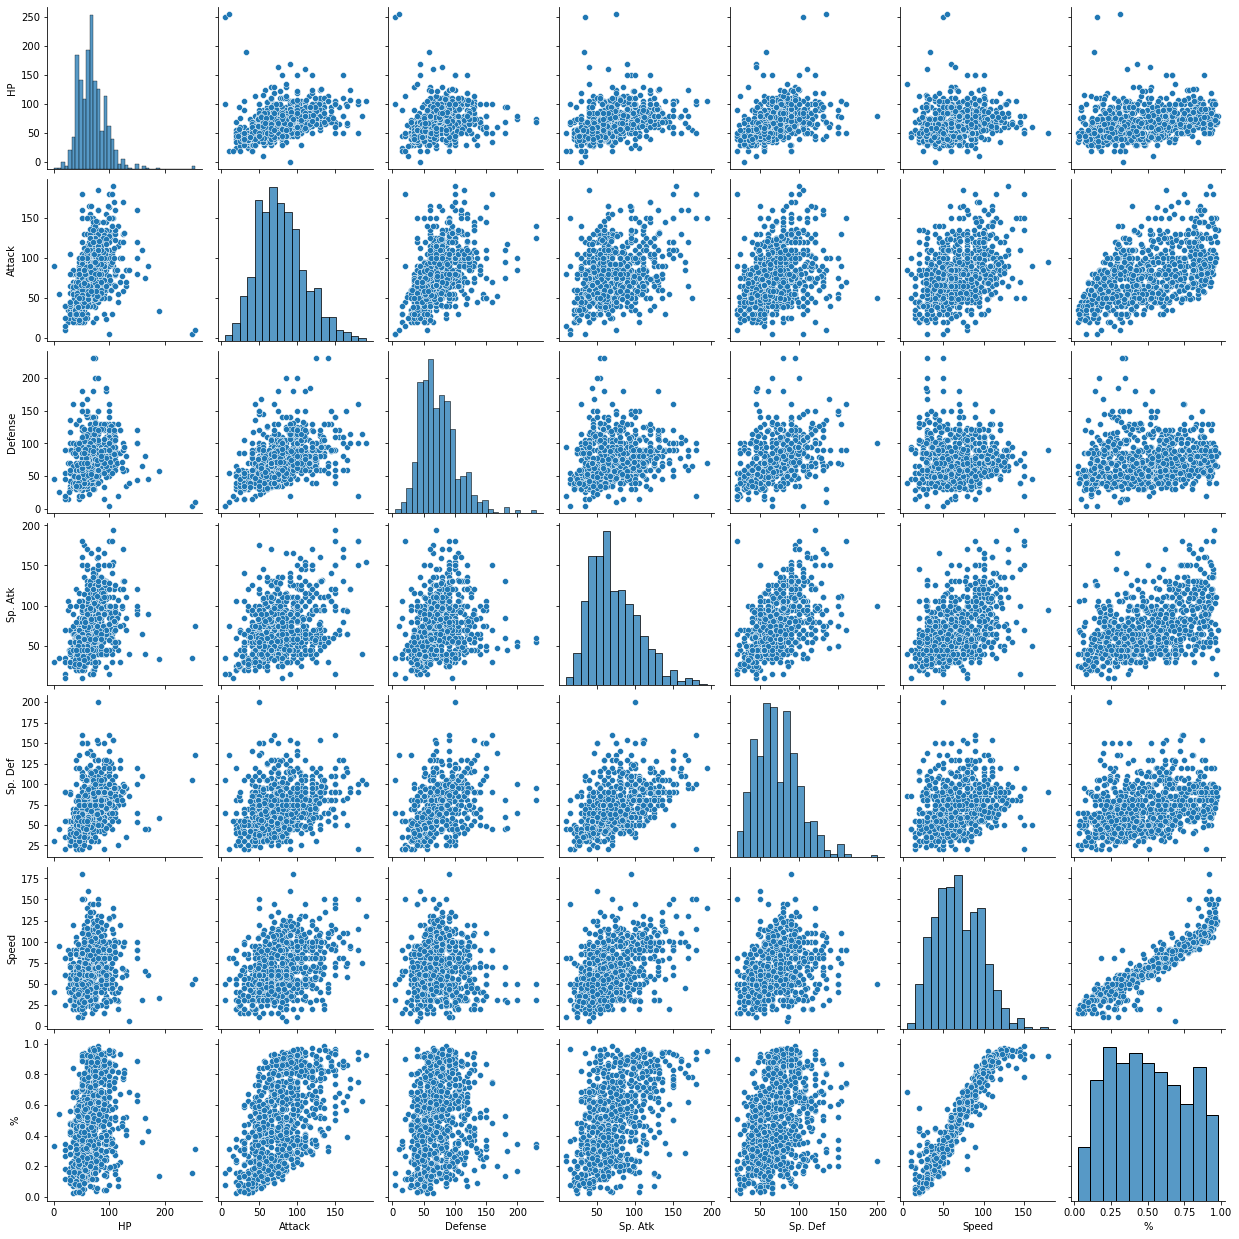

In [131]:
col = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', '%']
sns.pairplot(df[col])

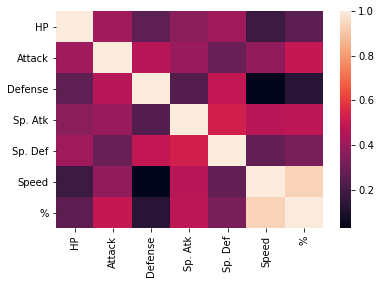

In [138]:
sns.heatmap(df[col].corr())
plt.show()

In [139]:
df[col].corr()['%']

HP         0.258006
Attack     0.500181
Defense    0.129426
Sp. Atk    0.478940
Sp. Def    0.324218
Speed      0.937742
%          1.000000
Name: %, dtype: float64

In [140]:
df[col].corr()['Speed']

HP         0.179423
Attack     0.382310
Defense    0.025762
Sp. Atk    0.470548
Sp. Def    0.276715
Speed      1.000000
%          0.937742
Name: Speed, dtype: float64

In [141]:
df[col].corr()['Attack']

HP         0.417427
Attack     1.000000
Defense    0.464539
Sp. Atk    0.395211
Sp. Def    0.288078
Speed      0.382310
%          0.500181
Name: Attack, dtype: float64

In [142]:
df[col].corr()['Sp. Atk']

HP         0.363244
Attack     0.395211
Defense    0.237592
Sp. Atk    1.000000
Sp. Def    0.529276
Speed      0.470548
%          0.478940
Name: Sp. Atk, dtype: float64

In [143]:
res = df[['Speed', 'Attack', '%']]
res.head()

,Speed,Attack,%
0,45,49,0.278195
1,60,62,0.380165
2,80,82,0.674242
3,80,100,0.560000
4,65,52,0.491071


In [27]:
df.drop(['#'], axis=1, inplace=True)
df.to_csv('data.csv')